In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/"

In [3]:
sorted(glob(data_path + "*labels.npy"))

['/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_0_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_10_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_11_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_12_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_13_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_14_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_15_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_16_labels.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_17_labels.npy',
 '/srv/projects/unsu

In [4]:
sorted(glob(data_path + "*embeddings.npy"))

['/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_0_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_10_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_11_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_12_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_13_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_14_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_15_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_16_embeddings.npy',
 '/srv/projects/unsupervised-vjepa/jepa_logs/embeddings_classification/vith16_wkw_test_batch_17_e

In [5]:
embeddings = np.concatenate([np.load(embedding_path).squeeze() for embedding_path in sorted(glob(data_path + "*embeddings.npy"))])
labels = np.concatenate([np.load(embedding_path).squeeze() for embedding_path in sorted(glob(data_path + "*labels.npy"))])


In [6]:
pca = PCA(n_components=2)

pca.fit(embeddings)
print(pca.explained_variance_ratio_)
embeddings_2d = pca.transform(embeddings)

[0.97134477 0.01054278]


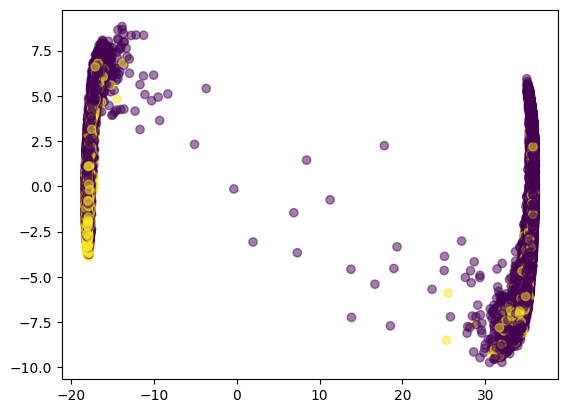

In [7]:
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, alpha=0.5)

In [8]:
np.unique(labels, return_counts=True)

(array([0., 1.], dtype=float32), array([82409, 17943]))

In [9]:
labels.shape

(100352,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, stratify=labels, test_size=0.2, random_state=1)

In [25]:
clf = MLPClassifier(random_state=1, early_stopping=True, n_iter_no_change=50, max_iter=1000).fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [23]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(np.float64(0.7638522427440633),
 np.float64(0.6453050989133463),
 np.float64(0.699592206615315),
 0.900901798614917)

In [24]:
precision_score(y_train, y_pred_train), recall_score(y_train, y_pred_train), f1_score(y_train, y_pred_train), accuracy_score(y_train, y_pred_train)

(np.float64(0.7748631200457629),
 np.float64(0.6605824160512749),
 np.float64(0.7131736301756233),
 0.9049962008445336)

In [15]:
clf.score(X_test, y_test)

0.9048378257186986

In [16]:
pca = PCA(n_components=2)

pca.fit(X_test)
print(pca.explained_variance_ratio_)
X_test_2d = pca.transform(X_test)

[0.9717572  0.01030583]


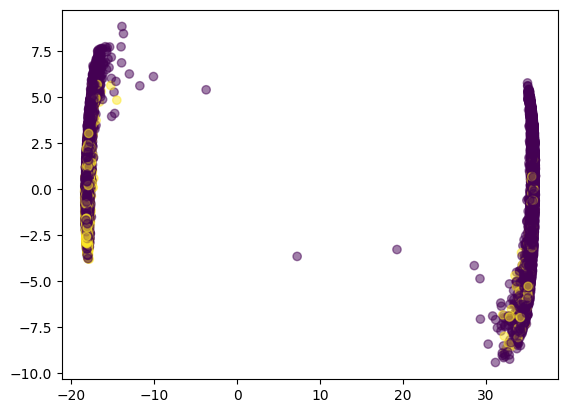

In [17]:
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, alpha=0.5)